<a href="https://colab.research.google.com/github/AleidaliMac/Machine-Learning/blob/master/Test_Kalypso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Read and Processing

In [ ]:
#Connection to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# #Extract files
# #Just one time
# import zipfile
    	
# fantasy_zip = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Kalypso/dataset tempMod CO_RH.zip')
# fantasy_zip.extractall('/content/drive/MyDrive/Colab Notebooks/Kalypso')

# fantasy_zip.close()

In [ ]:
#read as dataframe
import os
import pandas as pd
cols=['Time (s)', 'CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)',
       'Flow rate (mL/min)', 'Heater voltage (V)', 'R1 (MOhm)', 'R2 (MOhm)',
       'R3 (MOhm)', 'R4 (MOhm)', 'R5 (MOhm)', 'R6 (MOhm)', 'R7 (MOhm)',
       'R8 (MOhm)', 'R9 (MOhm)', 'R10 (MOhm)', 'R11 (MOhm)', 'R12 (MOhm)',
       'R13 (MOhm)', 'R14 (MOhm)']

all=[]
directory = '/content/drive/MyDrive/Colab Notebooks/Kalypso'
for root,dirs,files in os.walk(directory):
    for file in files:
       if file.endswith(".csv"):
         frame=pd.read_csv( os.path.join(directory,file),usecols=cols)
         frame['Timestamp']=str(file)[:-4]
         all.append(frame)

In [ ]:
DF=pd.concat(all)
print(DF.shape)
DF.head(1)

(3843147, 21)


Time (s)  CO (ppm)  ...  R14 (MOhm)        Timestamp
0     0.309       0.0  ...     41.9167  20160930_203718

[1 rows x 21 columns]

In [ ]:
DF.isnull().sum()

Time (s)              0
CO (ppm)              0
Humidity (%r.h.)      0
Temperature (C)       0
Flow rate (mL/min)    0
Heater voltage (V)    0
R1 (MOhm)             0
R2 (MOhm)             0
R3 (MOhm)             0
R4 (MOhm)             0
R5 (MOhm)             0
R6 (MOhm)             0
R7 (MOhm)             0
R8 (MOhm)             0
R9 (MOhm)             0
R10 (MOhm)            0
R11 (MOhm)            0
R12 (MOhm)            0
R13 (MOhm)            0
R14 (MOhm)            0
Timestamp             0
dtype: int64

In [ ]:
#Function to get timestamp with correct format

import time
import datetime
string = "20160930_203718"
dt=datetime.datetime.strptime(string, "%Y%m%d_%H%M%S")
print(dt)
sec=0.309
added_seconds = datetime.timedelta(0, sec)
new_dt = dt + added_seconds
print(new_dt)


def to_date(cadena,seg):
  dt=datetime.datetime.strptime(cadena, "%Y%m%d_%H%M%S")
  added_seconds = datetime.timedelta(0, seg)
  new_dt = dt + added_seconds
  return new_dt

2016-09-30 20:37:18
2016-09-30 20:37:18.309000


In [ ]:
DF['Tiempo']=DF.apply(lambda row: to_date(cadena=row['Timestamp'],seg=row['Time (s)']), axis=1)
DF['Tiempo'] = pd.to_datetime(DF['Tiempo'])

In [ ]:
DF.set_index('Tiempo',inplace=True)
DF.drop(columns=["Time (s)","Timestamp"],inplace=True)
DF.head(1)

CO (ppm)  Humidity (%r.h.)  ...  R13 (MOhm)  R14 (MOhm)
Tiempo                                               ...                        
2016-09-30 20:37:18.309       0.0             55.84  ...     31.7505     41.9167

[1 rows x 19 columns]

## Visualizations

Medidas de 13 días, en diferentes momentos del tiempo

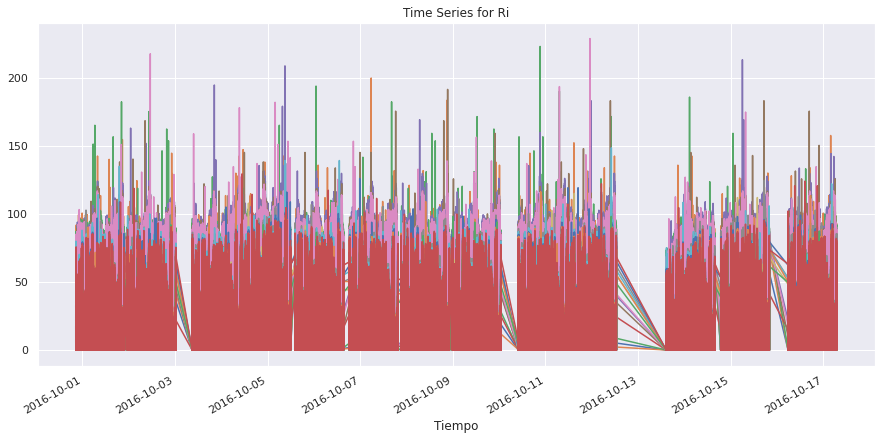

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(15,7))
for i in range(14):
  DF[f"R{i+1} (MOhm)"].plot()
plt.title("Time Series for Ri")

1 CO (ppm)
2 Humidity (%r.h.)
3 Temperature (C)
4 Flow rate (mL/min)
5 Heater voltage (V)


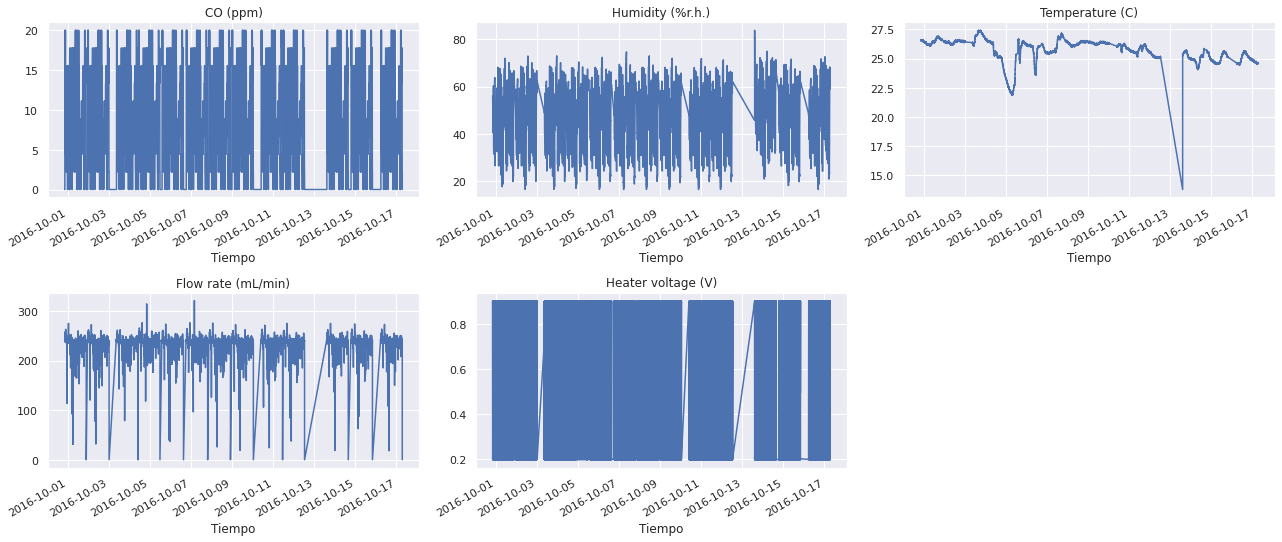

In [ ]:
cols=['CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)', 'Flow rate (mL/min)','Heater voltage (V)']
fig, ax=plt.subplots(figsize=(18,18))
for i,j in zip(range(1,5+1),cols):
  print(i,j)
  plt.subplot(5, 3, i)
  DF[j].plot()
  plt.title(f"{j}")
fig.tight_layout(pad=1.0)
plt.show()

In [ ]:
DF.describe()

CO (ppm)  Humidity (%r.h.)  ...    R13 (MOhm)    R14 (MOhm)
count  3.843147e+06      3.843147e+06  ...  3.843147e+06  3.843147e+06
mean   9.900512e+00      4.600408e+01  ...  2.328359e+01  2.919879e+01
std    6.427518e+00      1.246779e+01  ...  1.806999e+01  2.261724e+01
min    0.000000e+00      1.634000e+01  ...  3.210000e-02  3.130000e-02
25%    4.440000e+00      3.657000e+01  ...  7.825300e+00  9.804800e+00
50%    8.890000e+00      4.709000e+01  ...  2.204970e+01  2.740270e+01
75%    1.556000e+01      5.576000e+01  ...  3.595290e+01  4.550490e+01
max    2.000000e+01      8.381000e+01  ...  9.820950e+01  1.294220e+02

[8 rows x 19 columns]

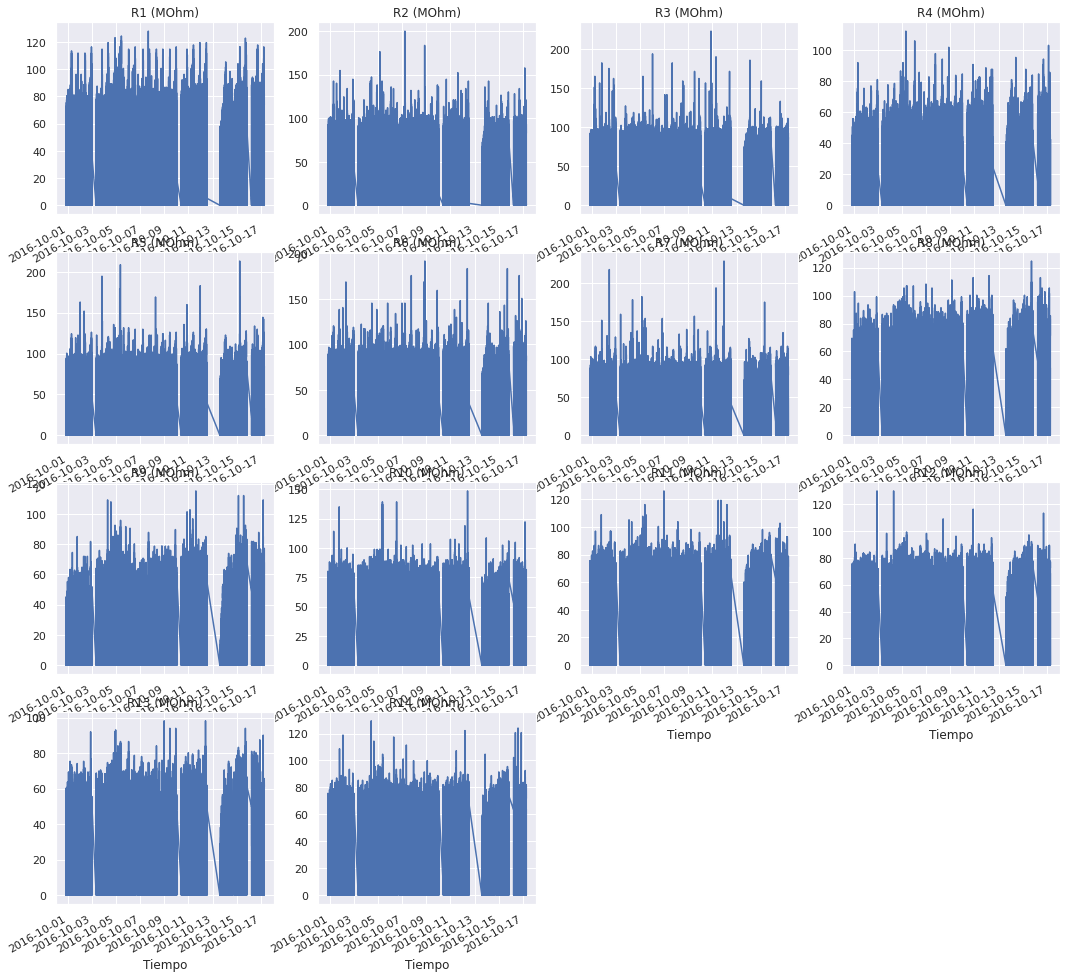

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
fig, ax=plt.subplots(figsize=(18,18))
for i in range(1,14+1):
  plt.subplot(4, 4, i)
  DF[f"R{i} (MOhm)"].plot()
  plt.title(f"R{i} (MOhm)")
fig.tight_layout(pad=1.0)
plt.show()

Se observa un comportamiento muy uniforme de los gases en todos los días, la única variable que muestra cierta tendencia conforme el tiempo es la tempertura.


In [ ]:
#FUNCIÓN QUE DEVUELVE HEATMAP DE MATRIZ DE CORRELACIONES
def MATCOR(dataframe,size=(10,6)):
  R=dataframe.corr()
  plt.figure(figsize=size)
  sns.heatmap(R,cmap="YlGnBu",annot=True,fmt='.1f',
            annot_kws={"size": 10},vmin=-1,vmax=1,linewidths=.1,square=True)
  plt.title("Matriz de correlación")

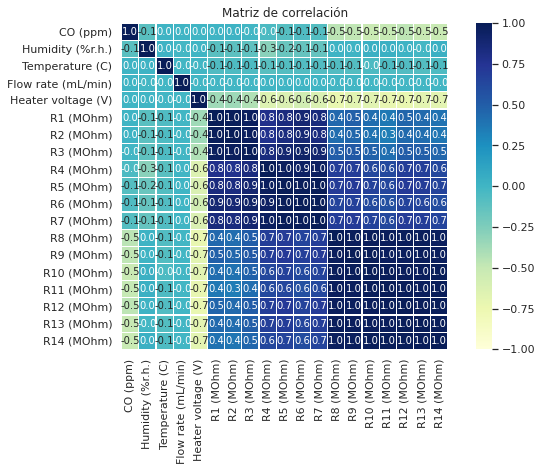

In [ ]:
#MATRIZ DE CORRELACION 
MATCOR(dataframe=DF)

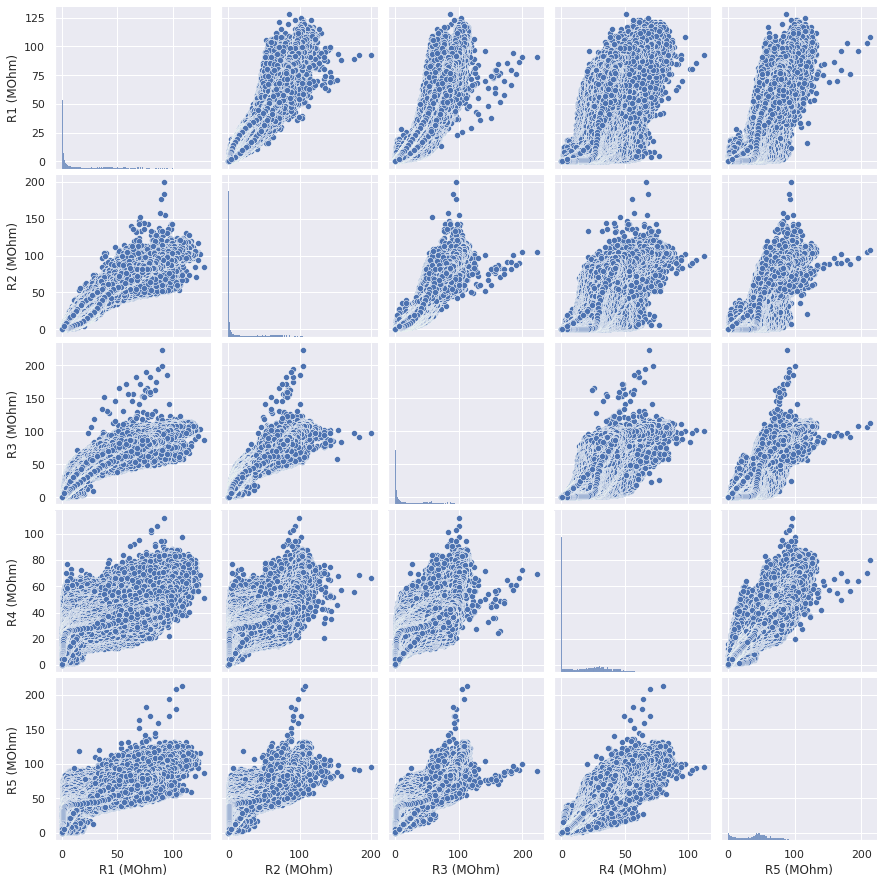

In [ ]:
import seaborn as sns
sns.set()
cols=['R1 (MOhm)', 'R2 (MOhm)', 'R3 (MOhm)',
       'R4 (MOhm)', 'R5 (MOhm)']
sns.pairplot(DF[cols])

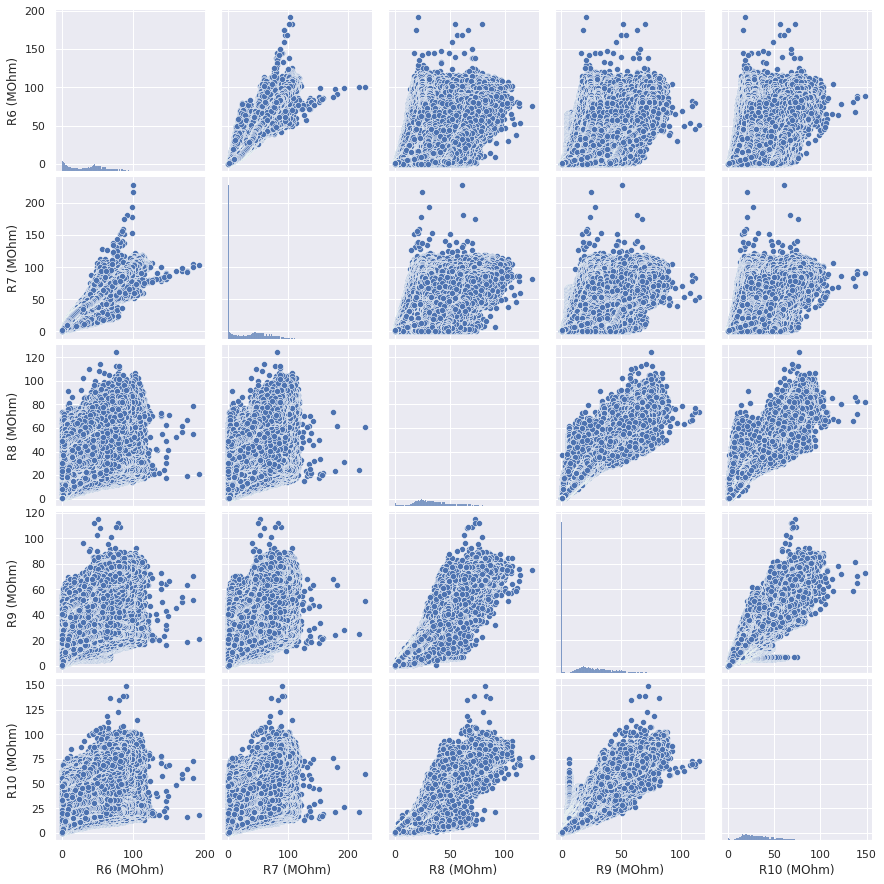

In [ ]:
cols=['R6 (MOhm)', 'R7 (MOhm)', 'R8 (MOhm)',
       'R9 (MOhm)', 'R10 (MOhm)']
sns.pairplot(DF[cols])

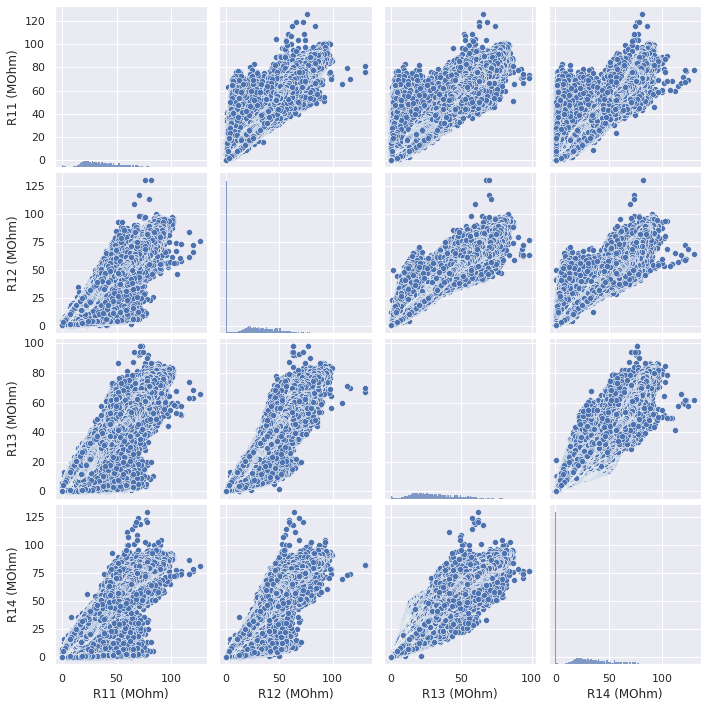

In [ ]:
cols=['R11 (MOhm)', 'R12 (MOhm)', 'R13 (MOhm)',
       'R14 (MOhm)']
sns.pairplot(DF[cols])

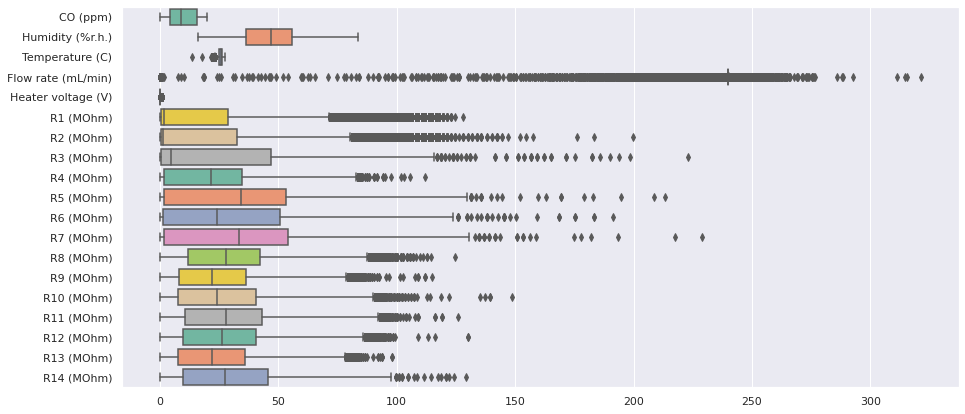

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.set()
sns.boxplot(data=DF, orient="h", palette="Set2")

Las medianas de los gases son muy similares, aunque los 3 primeros gases presentan una mediana mucho menor




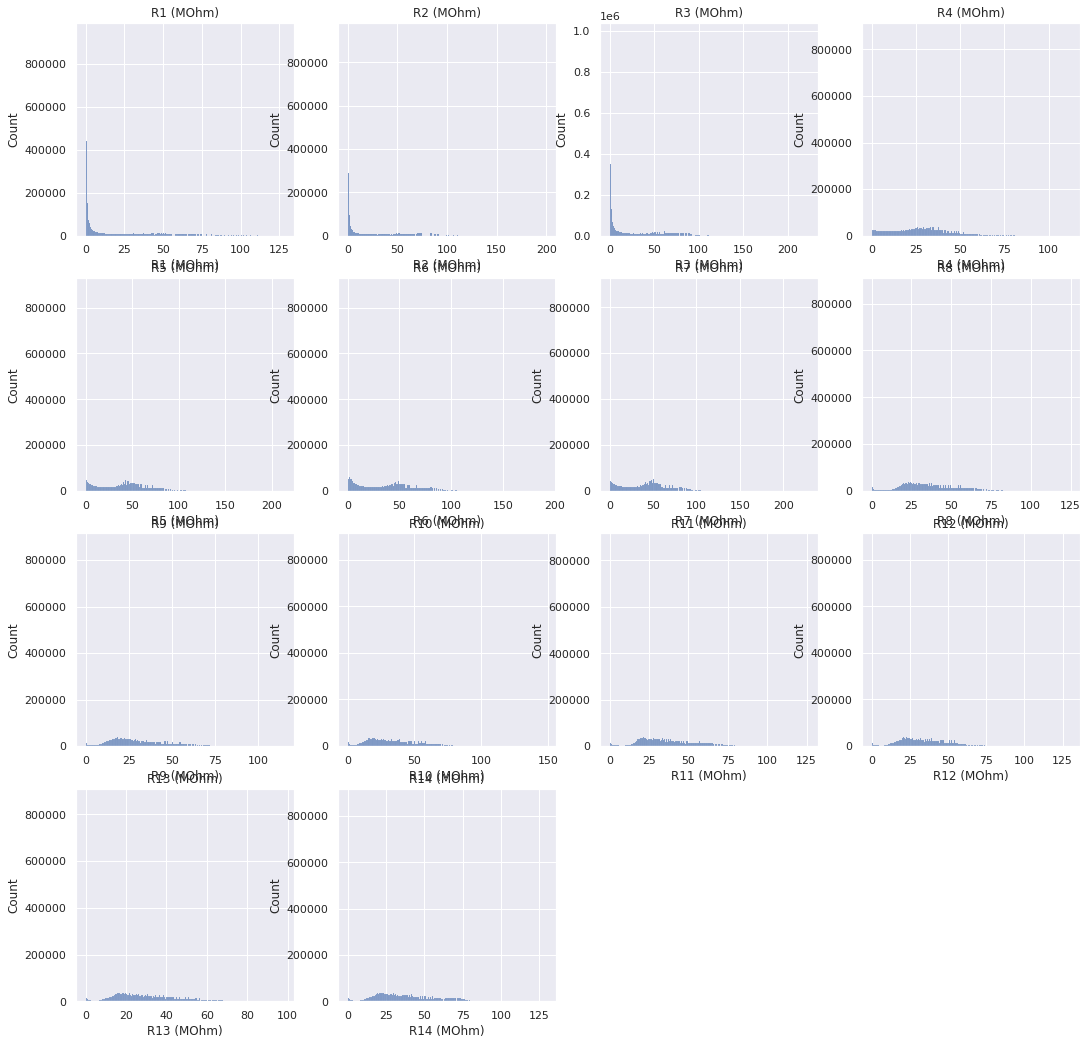

In [ ]:
#Histograma de los gases
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
fig, ax=plt.subplots(figsize=(18,18))
cols=['R1 (MOhm)', 'R2 (MOhm)', 'R3 (MOhm)',
       'R4 (MOhm)', 'R5 (MOhm)', 'R6 (MOhm)', 'R7 (MOhm)', 'R8 (MOhm)',
       'R9 (MOhm)', 'R10 (MOhm)', 'R11 (MOhm)', 'R12 (MOhm)', 'R13 (MOhm)',
       'R14 (MOhm)']
for i,j in zip(range(1,14+1),cols):
  plt.subplot(4, 4, i)
  sns.histplot(data=DF,x=j)
  plt.title(j)

fig.tight_layout(pad=1.0)
plt.show()

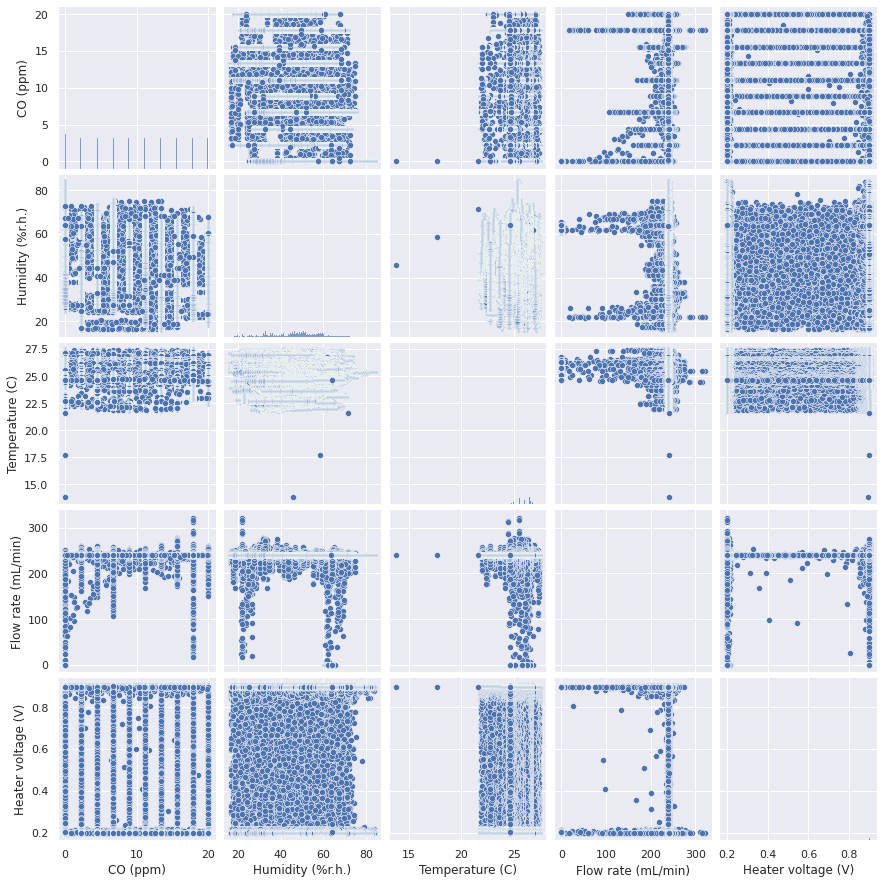

In [ ]:
import seaborn as sns
cols=['CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)', 'Flow rate (mL/min)','Heater voltage (V)']
sns.pairplot(DF[cols])

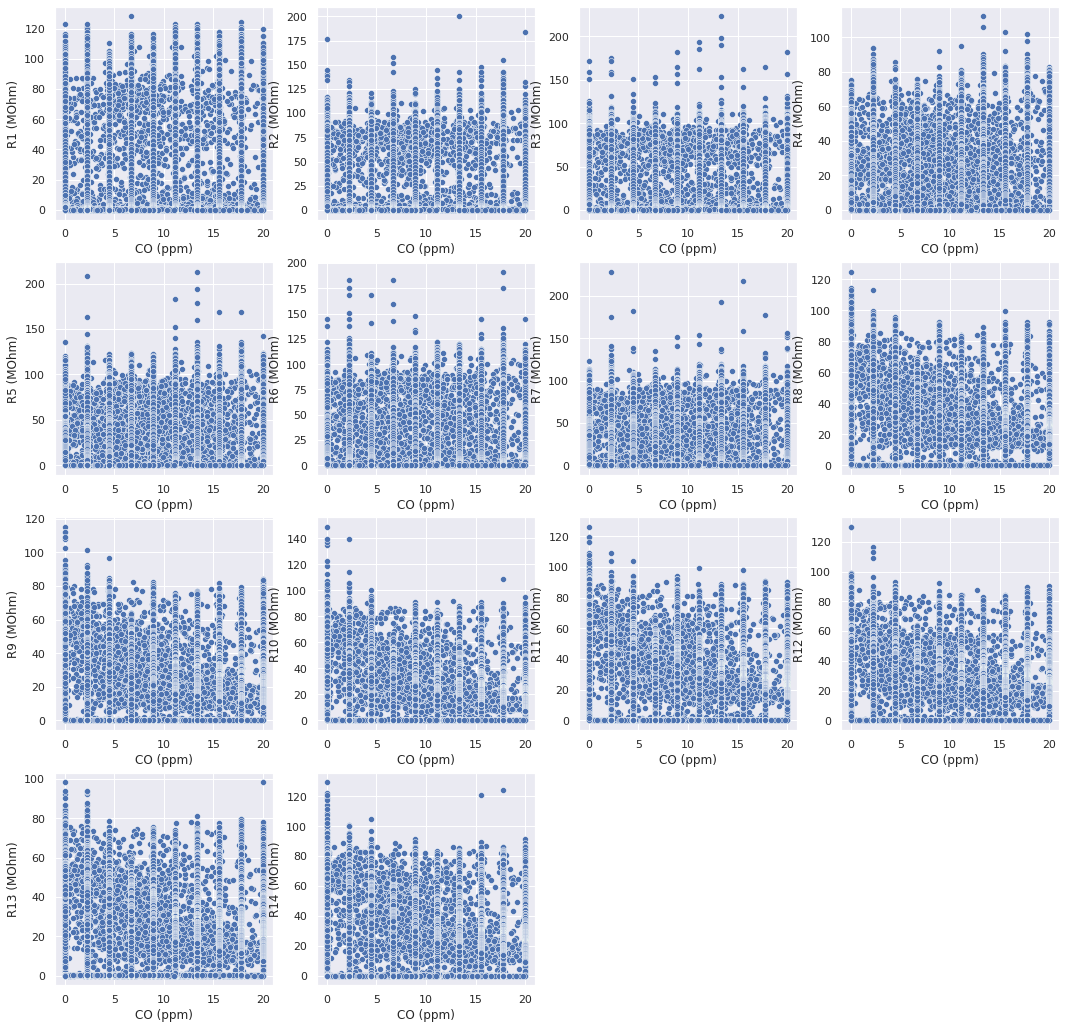

In [ ]:
#GASES VERSES CO
sns.set()
import matplotlib.pyplot as plt
fig, ax=plt.subplots(figsize=(18,18))

for i in range(1,14+1):
  plt.subplot(4, 4, i)
  sns.scatterplot(data=DF, x="CO (ppm)", y=f"R{i} (MOhm)")


##PCA

In [ ]:
# Dummy variable 
# 0 is no CO and 1 is presence of CO
DF["CO (ppm)"]=DF["CO (ppm)"].apply(lambda x: 0 if x==0 else 1)

In [ ]:
DF.head(1)

CO (ppm)  Humidity (%r.h.)  ...  R13 (MOhm)  R14 (MOhm)
Tiempo                                               ...                        
2016-09-30 20:37:18.309         0             55.84  ...     31.7505     41.9167

[1 rows x 19 columns]

Std 
 [77.076 38.725 15.042 11.364  4.58   3.845  3.251  2.837  2.511  2.411
  1.947  1.855  1.76   1.625  1.597  1.37   0.899  0.145]
Prop. Var. 
 [0.754 0.19  0.029 0.016 0.003 0.002 0.001 0.001 0.001 0.001 0.    0.
 0.    0.    0.    0.    0.    0.   ]
Var. Acum.
 [0.754 0.944 0.973 0.989 0.992 0.994 0.995 0.996 0.997 0.998 0.998 0.999
 0.999 0.999 1.    1.    1.    1.   ]
Loadings 
 [[-1.610e-02 -5.640e-02  5.121e-01 -8.316e-01 -8.950e-02  3.740e-02
   1.491e-01 -8.930e-02  3.270e-02  1.070e-02  2.000e-04  7.000e-04
  -2.580e-02  2.730e-02 -2.080e-02  8.300e-03 -8.900e-03 -1.700e-03]
 [-9.000e-04  2.000e-04  1.700e-03 -5.000e-04  2.130e-02 -1.400e-02
  -2.530e-02  5.900e-02  2.830e-02 -1.100e-02  7.720e-02 -1.600e-03
  -3.290e-02 -1.760e-02  9.200e-03  3.550e-02 -9.925e-01 -2.160e-02]
 [-0.000e+00  1.000e-04 -1.400e-03  4.000e-04 -1.900e-03  5.000e-04
   2.800e-03 -4.300e-03  1.600e-03 -5.000e-04 -2.590e-02 -9.991e-01
  -3.270e-02 -9.000e-04  4.800e-03 -9.300e-03  1.000e-04 -3.000e

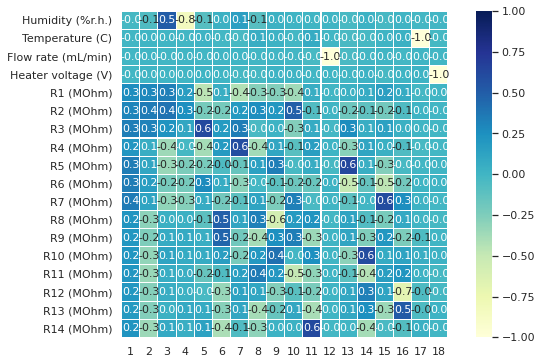

In [ ]:
#PCA

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pca = PCA()
X=DF.drop(columns=['CO (ppm)'])
etiquetas=DF["CO (ppm)"]
pca.fit(X)
print('Std \n', np.round(np.sqrt(pca.explained_variance_),3))
print('Prop. Var. \n', np.round(pca.explained_variance_ratio_,3))
print('Var. Acum.\n', np.round(np.cumsum(pca.explained_variance_ratio_),3))
print('Loadings \n', np.round(pca.components_.T,4))

n=X.shape[1]
# proyectar datos
Loadings=pd.DataFrame(pca.components_.T) 
Loadings.index=X.columns
pcas=[]
for i in range(1,n+1):
  pcas.append(i)
Loadings.columns=pcas

plt.figure(figsize=(10,6))
sns.heatmap(Loadings,cmap="YlGnBu",annot=True,fmt='.1f',
            annot_kws={"size": 11},vmin=-1,vmax=1,linewidths=.1,square=True)
plt.show()

In [ ]:
# proyectar datos
#1st and 2d components
proj = pd.DataFrame(pca.transform(X),columns = pcas)
proj['etiqueta']=etiquetas.reset_index(drop=True)
print(proj.shape)
proj.head(1)

(3843147, 19)


1          2          3  ...        17       18  etiqueta
0 -33.23793 -28.252235  16.309504  ... -0.893357  0.12973         0

[1 rows x 19 columns]

(3843147, 19)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


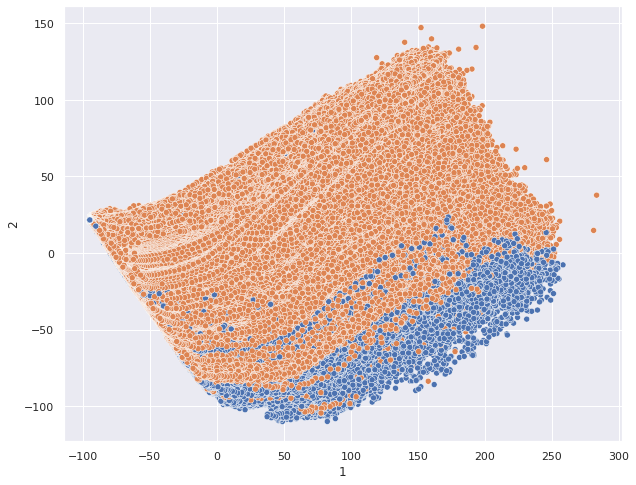

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(1,2,data=proj,hue="etiqueta",legend=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


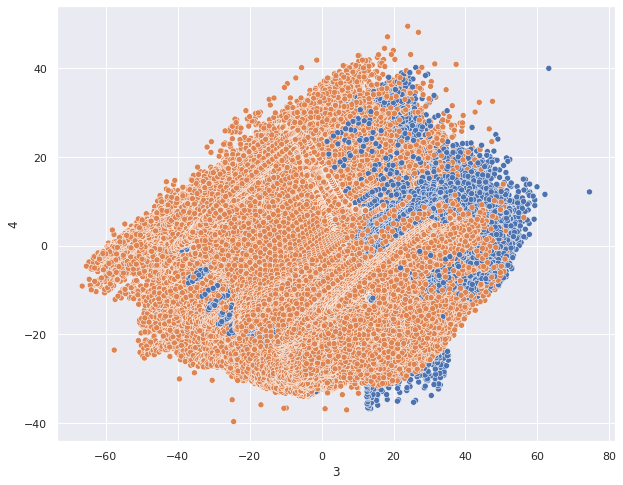

In [ ]:
# 3er y 4to componente
plt.figure(figsize=(10,8))
sns.scatterplot(3,4,data=proj,hue="etiqueta",legend=False)

## Prediction Model

El modelo consiste en detectar la presencia de CO (ppm).

Aplico un modelo de clasificación con un ENSAMBLE DE ÁRBOLES DE DECISIÓN (Random Forest).

**Variable Target (varible a predecir):** CO (ppm)

**Varbles Regresoras:**

Primeros 4 componentes principales


El modelo se desarrolla de la siguiente manera:

1. Creo variable dummy de C0 (ppm), 1 si hay un valor distinto de 0.
3. Reviso que las clases esten balanceadas, en este caso estan desbalanceadas, por lo tanto en necesario realizar un sobremuestreo de los datos de la clase minoritaria.
4. Con la base balanceada se crea un set de prueba y uno de entrenamiento.
5. Con el set de entrenamiento se hace una búsqueda de los parámetros óptimos para un modelo de ensamble de árboles de clasificación.
6. Se entrena el modelo con los valores óptimos del grid search.
7. Se evalúan el accuracy, el f1-score y su correspondiente matriz de confusión para el conjunto de prueba desglosado por clase. (El f1 score fue de +- 0.88 para ambas clases) 
8. Del modelo entrenado obtenemos la relevancia de las variables que se incluyeron en el modelo 
9. Finalmente, sobre la base sin balanceo se hace cross-validation y se registra el accuracy obtenido para el set de prueba, se ubica en 0.84, lo cual es bastante bueno, y garantizamos que ambas clases se predicen adecuadamente.

- ¿Cómo saber que es un buen modelo?
El f1-score toma en consideración tanto el recall como la precisión por clase, se debe encontrar muy cerca de 1 y esto asegurará el modelo predice correctamente ambas clases.


A continuación se presenta el código empleado, los resultados obtenidos y algunos comentarios sobre los hallazgos:

- Input: Base con variable target y los 4 primeros componentes principales
- Output: Predicción y criterios de evaluación 


###Model(with principal components)

In [ ]:
proj.head() # utilizo los primero 4 componentes

1          2          3  ...        17        18  etiqueta
0  -33.237930 -28.252235  16.309504  ... -0.893357  0.129730         0
1   47.143606 -47.300956  17.206420  ...  0.167595 -0.019559         0
2  110.844217 -26.602225  17.948069  ...  0.584442 -0.308066         0
3  136.941630  -2.850699  22.353383  ...  1.417623  0.182945         0
4  146.440594   3.307731  27.755582  ...  0.573842 -0.202676         0

[5 rows x 19 columns]

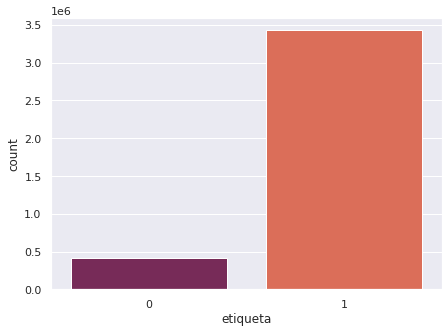

In [ ]:
#REVISO SI LAS CLASES ESTAN BALANCEADAS 
#ES NECESARIO BALANCEAR CLASES, VAMOS A SOBREMUESTREAR LA CLASE 0
import seaborn
plt.figure(figsize=(7,5))
sns.countplot(x='etiqueta', data=proj,palette="rocket")

In [ ]:
#Partimos la base en set de prueba y entrenamiento
X=proj[[1,2,3,4]]
y=proj.etiqueta

In [ ]:
X.head()

1          2          3         4
0  -33.237930 -28.252235  16.309504  0.664190
1   47.143606 -47.300956  17.206420 -0.617833
2  110.844217 -26.602225  17.948069 -4.671293
3  136.941630  -2.850699  22.353383 -4.739653
4  146.440594   3.307731  27.755582 -1.969821

In [ ]:
pip install imbalanced-learn ##LIBRERÍA PARA BALANCEO

In [ ]:
#OVERSAMPLING CLASE MINORITARIA
import imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


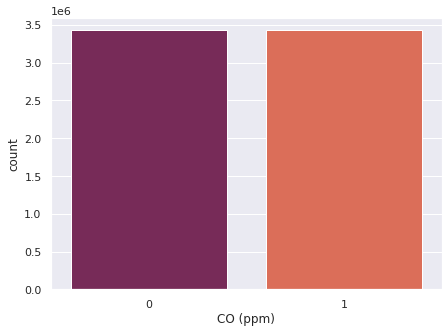

In [ ]:
import seaborn
plt.figure(figsize=(7,5))
test=pd.DataFrame(y,columns=['CO (ppm)'])
sns.countplot(x='CO (ppm)', data=test,palette="rocket")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(4794993, 4)
(4794993,)
(2054997, 4)
(2054997,)


In [ ]:
#SELECCIÓN DE LOS MEJORES PARÁMETROS PARA EL MODELO
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param = {'n_estimators':[10,20,30],'max_depth': [4,7,10]}
clasif = RandomForestClassifier()
search = GridSearchCV(estimator=clasif,param_grid=param,return_train_score=True,cv=5)
search.fit(X_train,y_train)

In [ ]:
#Verificamos cuales son los parámetros optimos y corremos el modelo con esos parámetros
depth_optimo=search.best_params_['max_depth']
n_optimo=search.best_params_['n_estimators']


In [ ]:
#Modelo con parámetros óptimos
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
cl = RandomForestClassifier(max_depth= depth_optimo,n_estimators=n_optimo)
cl.fit(X_train, y_train)
print("Test Accuracy")
cl.score(X_test,y_test)

Test Accuracy


0.875299574646581

In [ ]:
#Predicción
y_test_predict=cl.predict(X_test)
# Accuracy
print('Accuracy Train Set',cl.score(X_train,y_train),'\n')
print('Accuracy Test Set',cl.score(X_test,y_test),'\n')

from sklearn import metrics
print(metrics.classification_report(y_test_predict, y_test))
#EN AMBAS CLASES HAY UN F1-SCORE DE .88, BASTANTE BUENO

Accuracy Train Set 0.875862592500135 

Accuracy Test Set 0.875299574646581 

              precision    recall  f1-score   support

           0       0.88      0.87      0.88   1042400
           1       0.87      0.88      0.87   1012597

    accuracy                           0.88   2054997
   macro avg       0.88      0.88      0.88   2054997
weighted avg       0.88      0.88      0.88   2054997



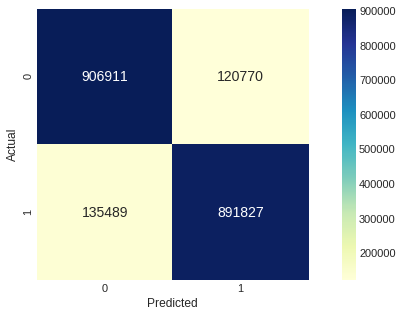

In [ ]:
#MATRIZ DE CONFUSIÓN
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12,5))
plt.style.use('seaborn-whitegrid')
matriz=confusion_matrix(y_test, y_test_predict)
df_cm = pd.DataFrame(matriz, columns=np.unique(y_test), index = np.unique(y_test_predict))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, square=True,cmap="YlGnBu", annot=True, annot_kws={"size": 14},fmt='d', cbar=True)


No handles with labels found to put in legend.


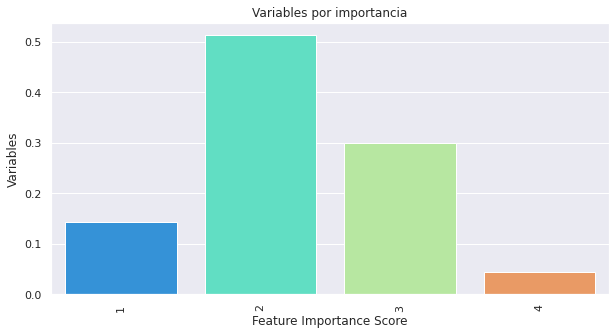

2    0.512587
3    0.299753
1    0.142773
4    0.044887
dtype: float64

In [ ]:
# La variables de mayor importancia son el numero de transacciones y cuántas de éstas son virtuales
# La varible de menor relevancia es si un usuarios es prime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

X=proj[[1,2,3,4]]
y=proj.etiqueta

feature_imp = pd.Series(cl.feature_importances_,index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=feature_imp.index,y=feature_imp,palette='rainbow')
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.xticks(rotation=90)
plt.ylabel('Variables')
plt.title("Variables por importancia")
plt.legend()
plt.show()
feature_imp

In [ ]:
#Cross validation 10 FOLDS USANDO DATOS ORIGINAL Y MODELO ENTRENADO
#En promedio conseguimos 83% de precisión
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
Score_TREE_clf=[]

score=cross_val_score(cl, X,y, cv=10)
Score_TREE_clf.append(score)
print('Mean Score CV: ',np.mean(score))
Score_TREE_clf

Mean Score CV:  0.8347645429362881


[array([0.84764543, 0.83055556, 0.83888889, 0.84166667, 0.83611111,
        0.83611111, 0.83611111, 0.82777778, 0.825     , 0.82777778])]